In [23]:
import cmath
import matplotlib
import sympy as sp
import random as rand
from sympy import init_printing
init_printing()

## Opgave 7

In [24]:
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}
W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

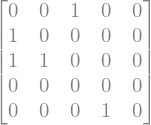

In [25]:
adjMatrixW1 = sp.Matrix([[0,0,1,0,0],
                        [1,0,0,0,0],
                        [1,1,0,0,0],
                        [0,0,0,0,0],
                        [0,0,0,1,0]])
adjMatrixW1

Vi ser at P5 er en sink, da det er en 0-vektor og ikke linker til andre hjemmesider.

# Opgave 8

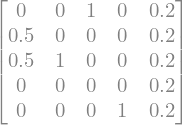

In [26]:
L_ij = sp.Matrix([[0,0,1,0,1/5],[1/2,0,0,0,1/5],[1/2,1,0,0,1/5],[0,0,0,0,1/5],[0,0,0,1,1/5]])
L_ij

Hvis der er link imellem $P_j$ og $P_i$ er sandsynligheden 1 over antallet af edges i $P_j$. Hvis $P_j$ er en sink, så er sandsynligheden 1 over antallet af alle hjemmesider.

Alle søjlerne er sandsynlighedsvektorer. Deres elementer er ikke-negative og summerer til 1.

Det er nærmest det samme som matricen, fordi mange af hjemmesiderne kun linker til en anden hjemmeside. De fleste nuller bliver ved med at være 0, men for P5, som er en sink bliver sandsynligheden for at komme ind på en vilkårlig side 1/5. 

# Opgave 9

In [27]:
def counter(p, counts):
    if p in counts:
        counts[p] += 1


In [28]:
chosenp = None
def surf_step(web, p):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    distribution=dict()
    counts = {key: 0 for key in web}
    
    distribution = dict(counts)

    if not p:  
        p = rand.choice(list(web.keys()))
    elif not web[p]: 
        p = rand.choice(list(web.keys()))
    else:
        p = rand.choice(list(web[p]))
    counter(p, counts)

    global chosenp
    chosenp = p

    total = sum(counts.values())
    if total > 0:
        for i in counts:
            distribution[i] = counts[i] / total

    return distribution


In [29]:
surf_step(W1, 'P1')

{'P1': 0.0, 'P2': 1.0, 'P3': 0.0, 'P4': 0.0, 'P5': 0.0}

# Opgave 10

In [30]:
import random
def random_surf(web, n):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    ranking = {key: 0 for key in web}

    p = random.choice(list(web.keys()))

    for _ in range(n):
        temp = surf_step(web, p) 
        
        for page in ranking:
            ranking[page] += temp.get(page, 0)

        p =  chosenp

    for page in ranking:
        ranking[page] /= n

    return ranking




# Opgave 11

In [31]:
random_surf(W1, 100)

{'P1': 0.38, 'P2': 0.24, 'P3': 0.38, 'P4': 0.0, 'P5': 0.0}

In [32]:
random_surf(W1, 1000)

{'P1': 0.405, 'P2': 0.19, 'P3': 0.405, 'P4': 0.0, 'P5': 0.0}

In [33]:
random_surf(W1, 10000)

{'P1': 0.3992, 'P2': 0.2015, 'P3': 0.3992, 'P4': 0.0, 'P5': 0.0001}

In [34]:
random_surf(W2, 100)

{'P1': 0.34, 'P2': 0.33, 'P3': 0.33, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}

In [35]:
random_surf(W2, 1000)

{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.334, 'P5': 0.333, 'P6': 0.333}

In [36]:
random_surf(W2, 10000)

{'P1': 0.3333, 'P2': 0.3334, 'P3': 0.3333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}

Funktionen giver en nogenlunde pålidelig måling af PageRank. I W2 ser vi at man kun kan besøge enten P1, P2 og P3 eller P4, P5 og P6 afhængigt af hvor man starter.

In [37]:
for n in range(1000, 1010, 1):
    print(random_surf(W1, n))

{'P1': 0.404, 'P2': 0.191, 'P3': 0.404, 'P4': 0.0, 'P5': 0.001}
{'P1': 0.3916083916083916, 'P2': 0.21578421578421578, 'P3': 0.3926073926073926, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.406187624750499, 'P2': 0.18762475049900199, 'P3': 0.406187624750499, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.4057826520438684, 'P2': 0.18743768693918245, 'P3': 0.4057826520438684, 'P4': 0.0, 'P5': 0.0009970089730807576}
{'P1': 0.3904382470119522, 'P2': 0.21912350597609562, 'P3': 0.3904382470119522, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.39502487562189054, 'P2': 0.208955223880597, 'P3': 0.39502487562189054, 'P4': 0.0, 'P5': 0.0009950248756218905}
{'P1': 0.40159045725646125, 'P2': 0.19582504970178927, 'P3': 0.4025844930417495, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.4001986097318769, 'P2': 0.19761668321747766, 'P3': 0.4011916583912612, 'P4': 0.0, 'P5': 0.0009930486593843098}
{'P1': 0.3998015873015873, 'P2': 0.2003968253968254, 'P3': 0.3998015873015873, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.400396432111001, 'P2': 0.19821605550049554, 'P3': 0.4013875

In [38]:
for n in range(1000, 1010, 1):
    print(random_surf(W2, n))

{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.333, 'P5': 0.334, 'P6': 0.333}
{'P1': 0.3336663336663337, 'P2': 0.3336663336663337, 'P3': 0.33266733266733267, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.3333333333333333, 'P2': 0.3333333333333333, 'P3': 0.3333333333333333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.33300099700897307, 'P5': 0.33300099700897307, 'P6': 0.3339980059820538}
{'P1': 0.3336653386454183, 'P2': 0.33266932270916333, 'P3': 0.3336653386454183, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.3333333333333333, 'P2': 0.3333333333333333, 'P3': 0.3333333333333333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.33300198807157055, 'P5': 0.33300198807157055, 'P6': 0.33399602385685884}
{'P1': 0.3326713008937438, 'P2': 0.3336643495531281, 'P3': 0.3336643495531281, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.3333333333333333, 'P5': 0.3333333333333333, 'P6': 0.3333333333333333}
{'P1': 0.333002973240832

# Opgave 12

In [39]:
chosenp = None
def surf_step_damp(web, p, d):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    distribution=dict()
    counts = {key: 0 for key in web}
    
    distribution = dict(counts)

    if not p:  
        p = rand.choice(list(web.keys()))
    elif not web[p]: 
        p = rand.choice(list(web.keys()))
    else:
        k = rand.randint(1, 100)
        if k > (d*100):
            p = rand.choice(list(web.keys()))
        else:
            p = rand.choice(list(web[p]))
    counter(p, counts)

    global chosenp
    chosenp = p

    total = sum(counts.values())
    if total > 0:
        for i in counts:
            distribution[i] = counts[i] / total

    return distribution


In [40]:
import random
def random_surf_damp(web, n, d):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    ranking = {key: 0 for key in web}

    p = random.choice(list(web.keys()))

    for _ in range(n):
        temp = surf_step_damp(web, p, d) 
        
        for page in ranking:
            ranking[page] += temp.get(page, 0)

        p =  chosenp

    for page in ranking:
        ranking[page] /= n

    return ranking




# Opgave 13

In [41]:
random_surf_damp(W1, 100, 0.85)

{'P1': 0.32, 'P2': 0.19, 'P3': 0.33, 'P4': 0.04, 'P5': 0.12}

In [42]:
random_surf_damp(W1, 1000, 0.85)

{'P1': 0.319, 'P2': 0.192, 'P3': 0.339, 'P4': 0.051, 'P5': 0.099}

In [43]:
random_surf_damp(W1, 10000, 0.85)

{'P1': 0.3436, 'P2': 0.1869, 'P3': 0.3509, 'P4': 0.0403, 'P5': 0.0783}

In [44]:
random_surf_damp(W2, 100, 0.85)

{'P1': 0.22, 'P2': 0.19, 'P3': 0.21, 'P4': 0.13, 'P5': 0.12, 'P6': 0.13}

In [45]:
random_surf_damp(W2, 1000, 0.85)

{'P1': 0.157, 'P2': 0.168, 'P3': 0.164, 'P4': 0.178, 'P5': 0.173, 'P6': 0.16}

In [46]:
random_surf_damp(W2, 10000, 0.85)

{'P1': 0.1713,
 'P2': 0.1722,
 'P3': 0.1684,
 'P4': 0.1627,
 'P5': 0.1617,
 'P6': 0.1637}

In [47]:
for n in range(1000, 1010, 1):
    print(random_surf_damp(W1, n, 0.85))

{'P1': 0.34, 'P2': 0.178, 'P3': 0.348, 'P4': 0.051, 'P5': 0.083}
{'P1': 0.33466533466533466, 'P2': 0.1998001998001998, 'P3': 0.34765234765234765, 'P4': 0.03796203796203796, 'P5': 0.07992007992007992}
{'P1': 0.3522954091816367, 'P2': 0.18463073852295409, 'P3': 0.36726546906187624, 'P4': 0.03493013972055888, 'P5': 0.06087824351297405}
{'P1': 0.34097706879361916, 'P2': 0.19740777666999004, 'P3': 0.3439680957128614, 'P4': 0.04187437686939183, 'P5': 0.07577268195413758}
{'P1': 0.33167330677290835, 'P2': 0.2051792828685259, 'P3': 0.3286852589641434, 'P4': 0.04880478087649402, 'P5': 0.08565737051792828}
{'P1': 0.3472636815920398, 'P2': 0.19203980099502488, 'P3': 0.35522388059701493, 'P4': 0.03681592039800995, 'P5': 0.06865671641791045}
{'P1': 0.34393638170974156, 'P2': 0.18190854870775347, 'P3': 0.3518886679920477, 'P4': 0.036779324055666, 'P5': 0.08548707753479125}
{'P1': 0.32969215491559084, 'P2': 0.18867924528301888, 'P3': 0.3326713008937438, 'P4': 0.05759682224428997, 'P5': 0.091360476663

In [48]:
for n in range(1000, 1010, 1):
    print(random_surf_damp(W2, n, 0.85))

{'P1': 0.113, 'P2': 0.117, 'P3': 0.122, 'P4': 0.216, 'P5': 0.214, 'P6': 0.218}
{'P1': 0.16683316683316685, 'P2': 0.16183816183816183, 'P3': 0.16083916083916083, 'P4': 0.17182817182817184, 'P5': 0.16683316683316685, 'P6': 0.17182817182817184}
{'P1': 0.156686626746507, 'P2': 0.15269461077844312, 'P3': 0.16167664670658682, 'P4': 0.17864271457085829, 'P5': 0.17465069860279442, 'P6': 0.17564870259481039}
{'P1': 0.17048853439680958, 'P2': 0.16350947158524426, 'P3': 0.17746759720837488, 'P4': 0.1625124626121635, 'P5': 0.16450648055832504, 'P6': 0.16151545363908276}
{'P1': 0.17131474103585656, 'P2': 0.16633466135458166, 'P3': 0.1643426294820717, 'P4': 0.16334661354581673, 'P5': 0.17131474103585656, 'P6': 0.16334661354581673}
{'P1': 0.12338308457711443, 'P2': 0.13333333333333333, 'P3': 0.13034825870646766, 'P4': 0.20597014925373133, 'P5': 0.19900497512437812, 'P6': 0.20796019900497512}
{'P1': 0.15904572564612326, 'P2': 0.16003976143141152, 'P3': 0.16003976143141152, 'P4': 0.17395626242544732, '